## Task 1: Download the data

In [1]:

!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

zsh:1: no matches found: https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


In [2]:
# Essential libraries are imported
import pandas as pd
import matplotlib.pyplot as plt

# Data loading
data = pd.read_csv('FremontBridge.csv', parse_dates=['Date'], index_col='Date')

# Look up the first 5 rows
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [3]:
data.columns = ['Total', 'West', 'East']

In [4]:
data.dropna().describe()

,Total,West,East
count,105116.000000,105116.000000,105116.000000
mean,106.545569,45.701967,60.843601
std,132.098939,59.570117,82.227507
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,60.000000,26.000000,32.000000
75%,146.000000,63.000000,80.000000
max,1097.000000,667.000000,850.000000


In [5]:
%matplotlib inline
import seaborn; seaborn.set()

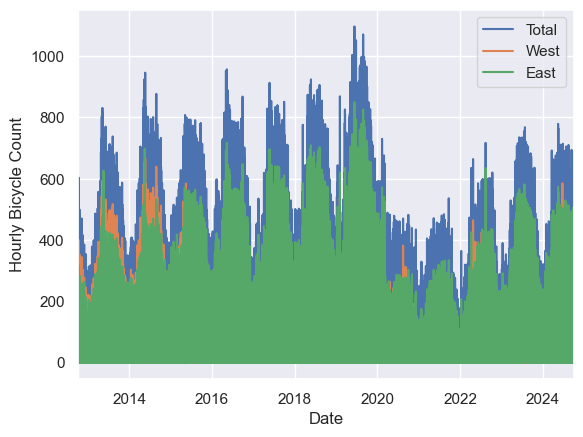

In [6]:
data.plot(ylabel='Hourly Bicycle Count');

## TASK 2: Plot the Weekly bicycle crossings of Seattle’s Fremont bridge data using Resample method

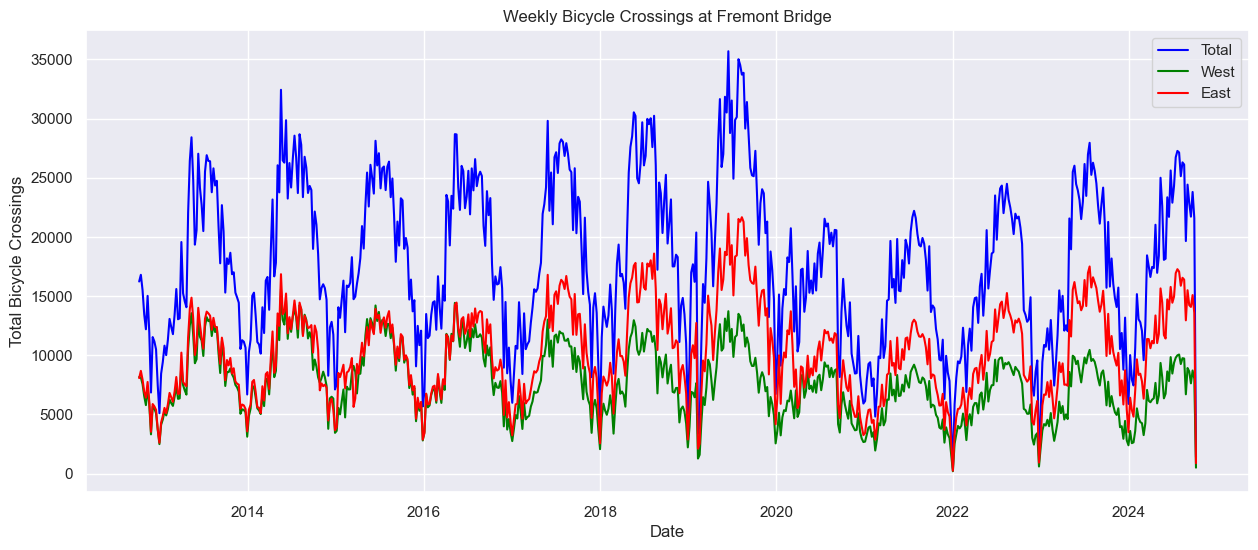

In [7]:
# First, resample hourly data to daily
daily_data = data.resample('D').sum()
# Weekly report for ALL columns (TOTAL, WEST, EAST) 'W' represents the frequency in weekly, group the data into weekly and sum weekly for all
data_weekly = daily_data.resample('W').sum()

# Create a plot for bicycle crossing each total west and east columns
# Rearrange the size of the table to make it readable
plt.figure(figsize=(15, 6))
plt.plot(data_weekly.index, data_weekly['Total'], label='Total', color='blue')
plt.plot(data_weekly.index, data_weekly['West'], label='West', color='green')
plt.plot(data_weekly.index, data_weekly['East'], label='East', color='red')
plt.xlabel('Date')
plt.ylabel('Total Bicycle Crossings')
plt.title('Weekly Bicycle Crossings at Fremont Bridge')
plt.legend()
plt.grid(True)
plt.show()

## Task 3: Plot the Weekly bicycle crossings of Seattle’s Fremont bridge data using a rolling mean. (hint: resample daily data, rolling mean on 7 days in right/default and plot.)

In [8]:
print(data.columns)

Index(['Total', 'West', 'East'], dtype='object')


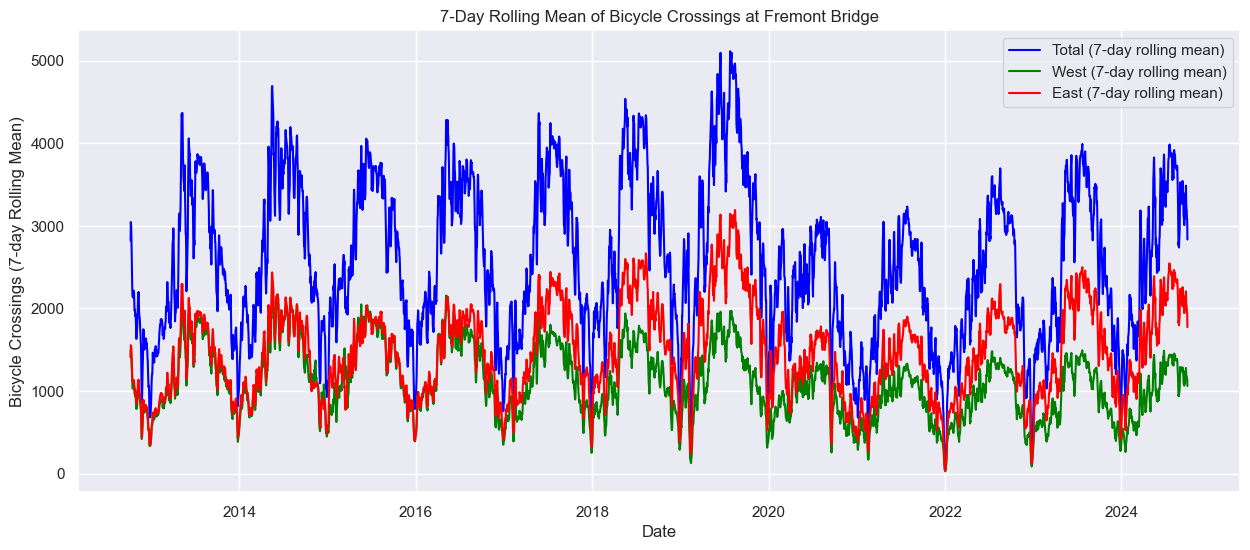

In [9]:
# On a 7-days rolling mean to smooth the daily data
rolling_mean = daily_data.rolling(window=7).mean()


# Plot the rolling mean for 'Total', 'West', and 'East'
plt.figure(figsize=(15, 6))

# Plot each column with the 7-day rolling mean
plt.plot(rolling_mean.index, rolling_mean['Total'], label='Total (7-day rolling mean)', color='blue')
plt.plot(rolling_mean.index, rolling_mean['West'], label='West (7-day rolling mean)', color='green')
plt.plot(rolling_mean.index, rolling_mean['East'], label='East (7-day rolling mean)', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Bicycle Crossings (7-day Rolling Mean)')
plt.title('7-Day Rolling Mean of Bicycle Crossings at Fremont Bridge')
plt.legend()
plt.grid(True)
plt.show()

## Task 4: 50 days rolling mean with Guassian function (std set to 30 days) 

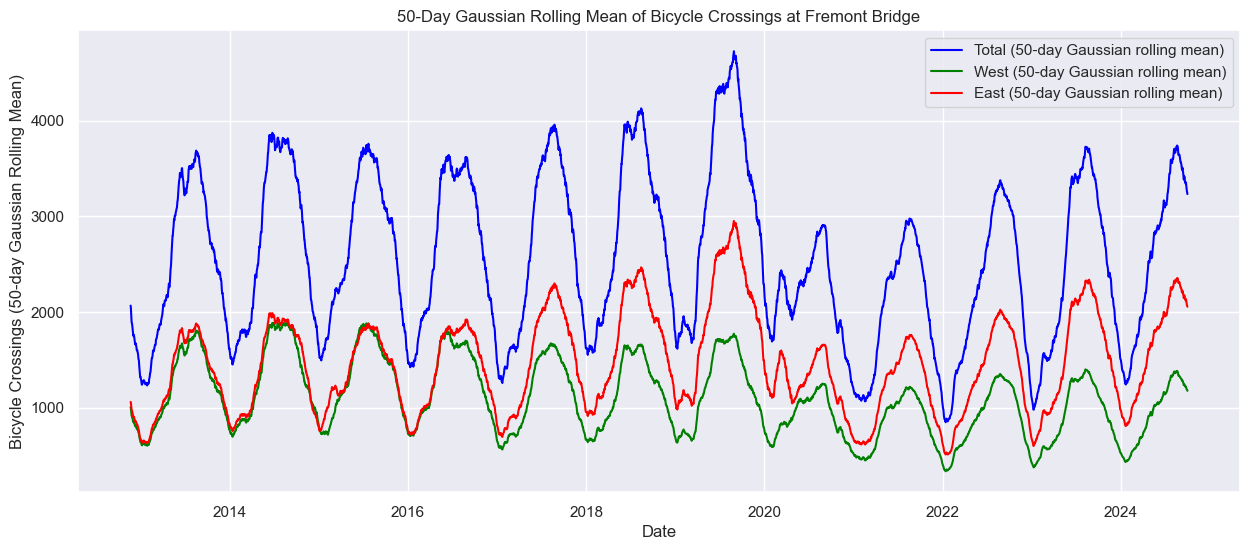

In [10]:
# Apply a Gaussian rolling mean with a 50-day window and std set to 30 days
gaussian_mean = daily_data.rolling(window=50, win_type='gaussian').mean(std=30)

# Plot the Gaussian rolling mean for 'Total', 'West', and 'East'
plt.figure(figsize=(15, 6))

# Plot each column with the Gaussian 50-day rolling mean
plt.plot(gaussian_mean.index, gaussian_mean['Total'], label='Total (50-day Gaussian rolling mean)', color='blue')
plt.plot(gaussian_mean.index, gaussian_mean['West'], label='West (50-day Gaussian rolling mean)', color='green')
plt.plot(gaussian_mean.index, gaussian_mean['East'], label='East (50-day Gaussian rolling mean)', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Bicycle Crossings (50-day Gaussian Rolling Mean)')
plt.title('50-Day Gaussian Rolling Mean of Bicycle Crossings at Fremont Bridge')
plt.legend()
plt.grid(True)
plt.show()

## Task 5: Average daily bicycle counts. X axis is Monday to Sunday. We will have to achieve to this digram.

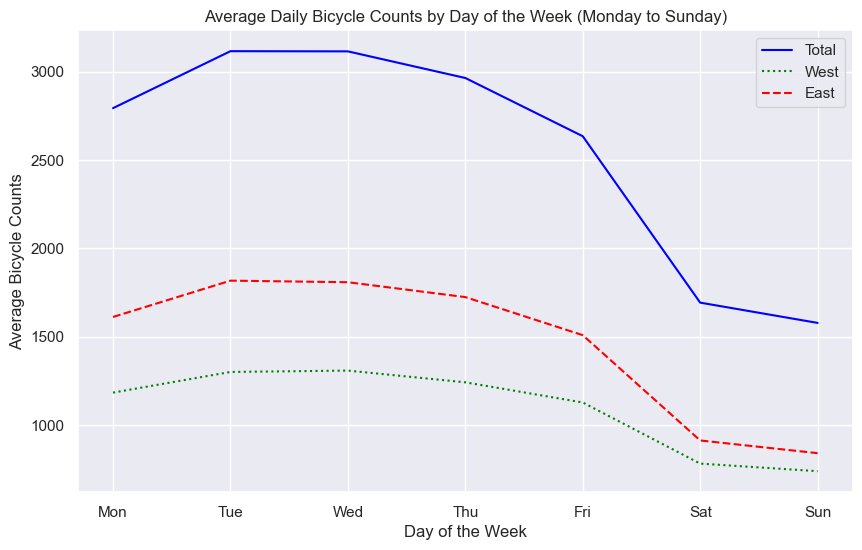

In [11]:
# Create a new column for the day of the week (0 = Monday, 6 = Sunday)
daily_data['Day_of_Week'] = daily_data.index.dayofweek

# Group the data by day of the week and calculate the mean
avg_daily_counts = daily_data.groupby('Day_of_Week').mean()

# Plot the average daily counts for West, East, and Total
plt.figure(figsize=(10, 6))

# Plot each column with different line styles
plt.plot(avg_daily_counts.index, avg_daily_counts['Total'], label='Total', linestyle='-', color='blue')
plt.plot(avg_daily_counts.index, avg_daily_counts['West'], label='West', linestyle=':', color='green')
plt.plot(avg_daily_counts.index, avg_daily_counts['East'], label='East', linestyle='--', color='red')

# Customize the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Bicycle Counts')
plt.title('Average Daily Bicycle Counts by Day of the Week (Monday to Sunday)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

## Task 6: Plot daily data by hourly

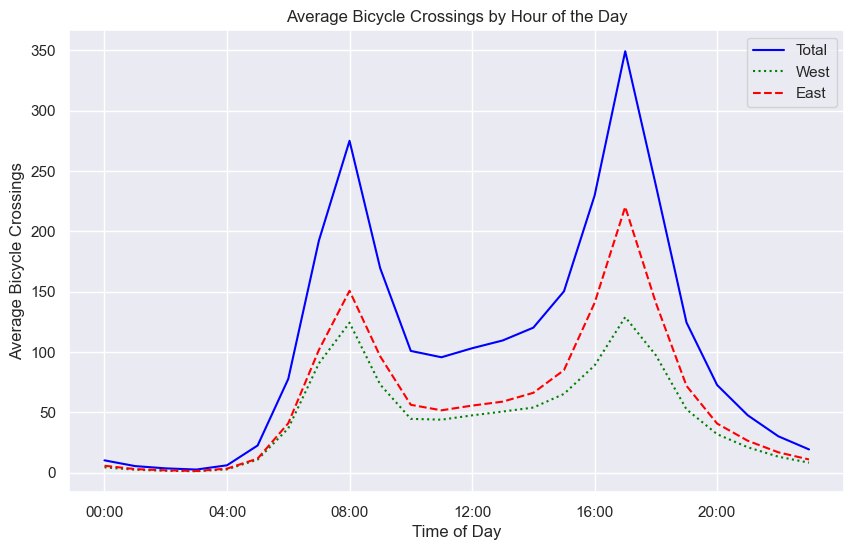

In [12]:
# Extract the hour from the index
data['Hour'] = data.index.hour

# Group the data by the hour and calculate the mean for each hour
avg_by_hour = data.groupby('Hour').mean()

# Plot the hourly data with custom hourly ticks
plt.figure(figsize=(10, 6))

# Plot Total, West, and East bicycle crossings by hour
plt.plot(avg_by_hour.index, avg_by_hour['Total'], label='Total', linestyle='-', color='blue')
plt.plot(avg_by_hour.index, avg_by_hour['West'], label='West', linestyle=':', color='green')
plt.plot(avg_by_hour.index, avg_by_hour['East'], label='East', linestyle='--', color='red')

# Customize the plot with hourly ticks
# Set the xticks for every 4 hours (0, 4, 8, 12, 16, 20)
plt.xticks(ticks=range(0, 24, 4), labels=['00:00', '04:00', '08:00', '12:00', '16:00', '20:00'])

# Add labels, title, and legend
plt.xlabel('Time of Day')
plt.ylabel('Average Bicycle Crossings')
plt.title('Average Bicycle Crossings by Hour of the Day')
plt.legend()
plt.grid(True)
plt.show()

TASK-1
The dataset, which records the number of cyclists passing from both the West and East directions, was carefully prepared and parsed to ensure accurate integration for a comprehensive view of the traffic patterns. The data was organized under three key columns: Total, West, and East, representing the overall and directional counts of cyclists.

TASK-2
In this task, the resampling method was employed to aggregate the bicycle crossing data into weekly intervals. This approach allowed for a broader understanding of traffic patterns over weeks, rather than focusing on daily or monthly fluctuations, providing insights into longer-term trends.

TASK-3
In this task, the rolling mean technique was applied to the weekly resampled bicycle crossing data. This method smooths out short-term fluctuations, highlighting longer-term trends. The rolling mean was computed using the rolling() function.

TASK-4
This task involved the application of a Gaussian window function with a 50-day window and a standard deviation of 30 days, to smooth the weekly bicycle crossing data. This method provided a refined view of the traffic patterns, with specific emphasis on longer-term temporal trends.

TASK-5
This task focused on calculating the average daily bicycle counts for each day of the week, from Monday to Sunday. The data was then plotted to visually represent the variations in cycling activity throughout the week. This analysis offered valuable insights into daily commuting patterns, highlighting which days of the week saw the most traffic.

TASK-6
In this task, the data was grouped by hour (0-23) to calculate the average number of crossings per hour. The result was plotted with custom hourly ticks set at 4-hour intervals (e.g., 00:00, 04:00, 08:00, etc.), providing a clear view of how cycling traffic varies throughout the day. This analysis offered further insight into the times of day when cyclists are most active, particularly during commuting hours.

CONCLUSION
The analysis examined the bicycle traffic on Seattle's Fremont Bridge using a dataset collected from automatic counters. By applying statistical methods such as rolling averages and Gaussian smoothing techniques, clear traffic patterns were uncovered. 